In [1]:
# Importing modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import svm

sns.set()

In [2]:
# importing data

data = pd.read_csv('../data/labeled_data.csv')
dataTrain, dataTest = train_test_split(data, train_size=0.8)

In [3]:
dataTrain

,Nervousness_Label,Unable to control_Label,Worry_Label,Trouble in Relaxation_Label,Restlessness_Label,Irritability_Label,Fear_Label,Stress_Label
8508,0,2,1,2,1,0,1,1
10200,0,1,1,0,3,2,3,1
9145,3,0,1,3,0,3,0,1
4400,2,2,2,2,1,1,2,2
15510,1,2,3,2,0,2,2,2
...,...,...,...,...,...,...,...,...
15200,3,1,0,3,2,3,1,2
16293,0,2,2,0,3,1,0,1
15528,1,2,3,2,1,2,0,2
935,3,2,2,0,0,3,3,2


In [4]:
dataTest

,Nervousness_Label,Unable to control_Label,Worry_Label,Trouble in Relaxation_Label,Restlessness_Label,Irritability_Label,Fear_Label,Stress_Label
12022,0,2,3,1,0,3,3,2
12537,0,0,0,1,1,2,0,0
433,2,0,0,1,1,1,1,1
8587,1,1,2,3,1,3,2,2
1629,1,2,1,1,2,1,3,2
...,...,...,...,...,...,...,...,...
5589,0,3,3,0,2,1,3,2
7999,0,3,0,2,3,3,1,2
1213,2,1,1,3,0,2,0,1
3181,0,1,0,3,2,3,0,1


                             Nervousness_Label  Unable to control_Label  \
Nervousness_Label                 1.000000e+00             2.873136e-17   
Unable to control_Label           2.873136e-17             1.000000e+00   
Worry_Label                      -1.093960e-17             1.989511e-17   
Trouble in Relaxation_Label       4.479381e-17            -1.083660e-17   
Restlessness_Label                3.588709e-17             5.507747e-18   
Irritability_Label               -2.359224e-17             2.800494e-17   
Fear_Label                        1.363493e-16            -8.114440e-17   
Stress_Label                      3.344239e-01             3.344239e-01   

                              Worry_Label  Trouble in Relaxation_Label  \
Nervousness_Label           -1.093960e-17                 4.479381e-17   
Unable to control_Label      1.989511e-17                -1.083660e-17   
Worry_Label                  1.000000e+00                -4.183394e-17   
Trouble in Relaxation_Label 

<AxesSubplot:>

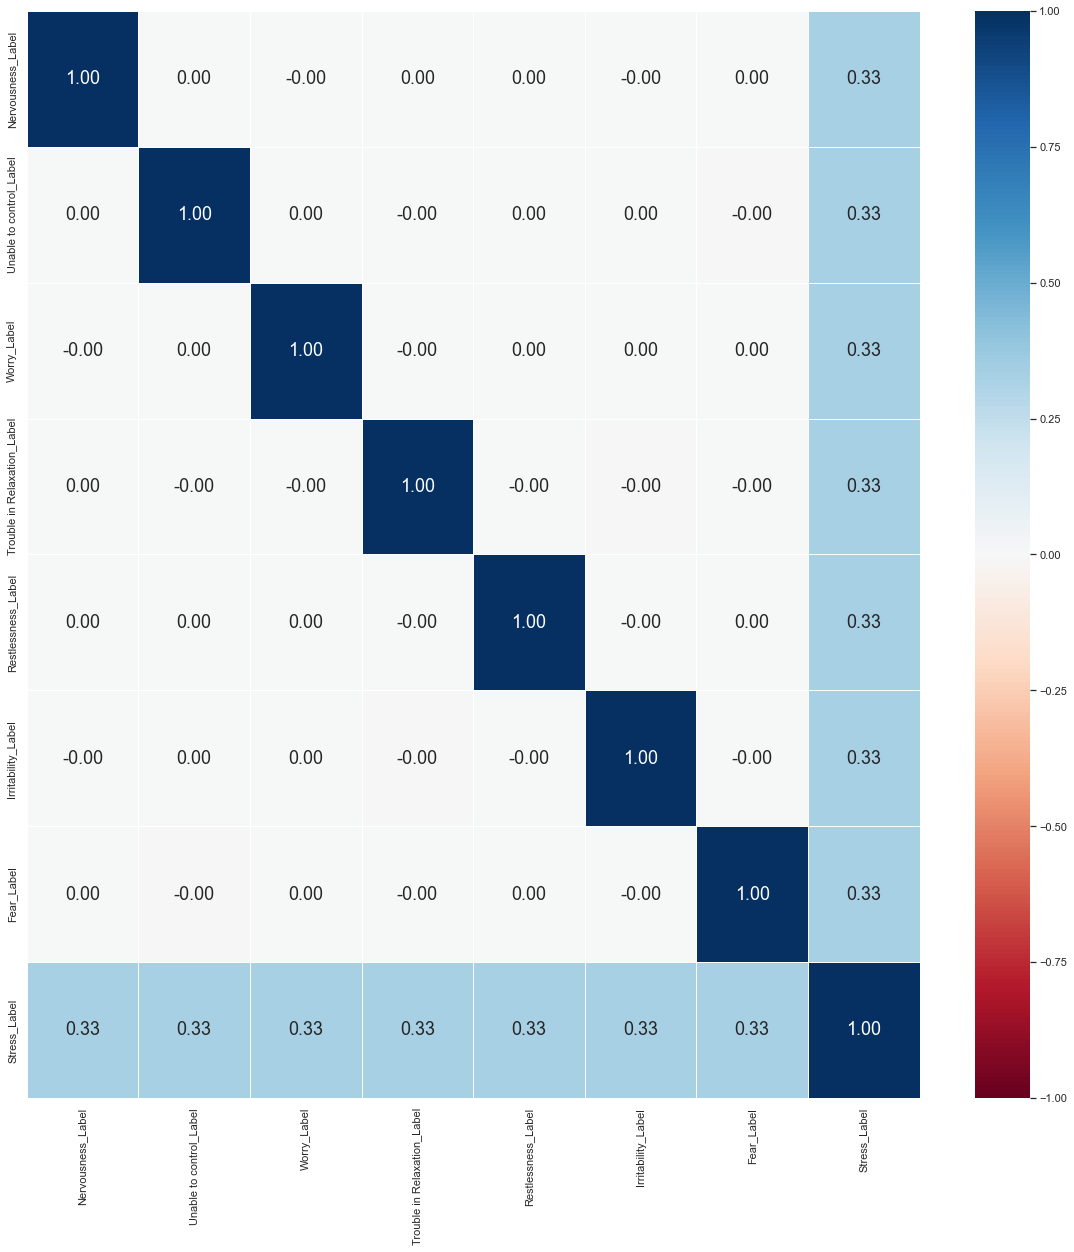

In [17]:
# Correlation Matrix
print(data.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

### Predicting variables = "Nervoursness_Label", "Unable to control_Label", "Worry_Label", "Trouble in Relaxation_Label", "Restlessness_Label", "Irritatbility_Label", "Fear_Label"

### Variable to predict = "Stress_Label"

## From the above heatmap, we can see that the correlation between each variables in the predicting variables have almost no correlation

## However, all the predicting variables have same correlation in relation to the variable to predict, of 0.33

## Therefore, there is no one factor that affects "Stress" the most, and all the other variables have equal importance in predicting "Stress"

## Function to score each model

In [6]:
def scoreModel(clf):
    return clf.score(dataTest.drop(['Stress_Label'], axis=1), dataTest['Stress_Label'])

## Using SVM Linear

SVM Linear is the fastest SVM model but may have the lowest level of accuracy.

In [7]:
clf = make_pipeline(StandardScaler(), svm.LinearSVC(random_state=0, tol=1e-5))
clf.fit(dataTrain.drop(['Stress_Label'], axis=1), dataTrain['Stress_Label'])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

In [8]:
scoreModel(clf)

0.9627708269758926

## Training other models

These models take longer to train as they have a higher time complexity.

In [9]:
### SVM Training Constant

C = 1.0

In [10]:
# SVM Linear Kernel

clfLIN = make_pipeline(StandardScaler(), svm.SVC(kernel="linear", C=C))
clfLIN.fit(dataTrain.drop(['Stress_Label'], axis=1), dataTrain['Stress_Label'])

clfRBF = make_pipeline(StandardScaler(), svm.SVC(kernel="rbf", gamma='auto', C=C))
clfRBF.fit(dataTrain.drop(['Stress_Label'], axis=1), dataTrain['Stress_Label'])

clfPOLY = make_pipeline(StandardScaler(), svm.SVC(kernel="poly", degree=4, gamma='auto', C=C))
clfPOLY.fit(dataTrain.drop(['Stress_Label'], axis=1), dataTrain['Stress_Label'])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(degree=4, gamma='auto', kernel='poly'))])

In [11]:
### Determining Score for SVM models

scores = {
    'linear': scoreModel(clf),
    'clfLIN': scoreModel(clfLIN),
    'clfRBF': scoreModel(clfRBF),
    'clfPOLY': scoreModel(clfPOLY),
}

for name, val in scores.items():
    print(f"{name}: {val}")

linear: 0.9627708269758926
clfLIN: 1.0
clfRBF: 1.0
clfPOLY: 0.4528532194079951


<AxesSubplot:>

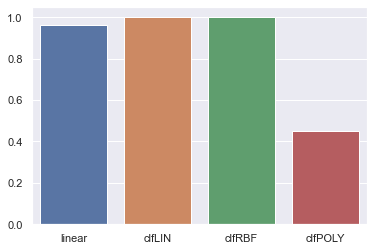

In [12]:
### plotting graph accuracy

keys = list(scores.keys())
vals = [float(scores[k]) for k in keys]
sns.barplot(x=keys, y=vals)

For SVM Linear:

For SVM with linear kernel:

For SVM with RBF kernel:

For SVM with polynomial kernel:



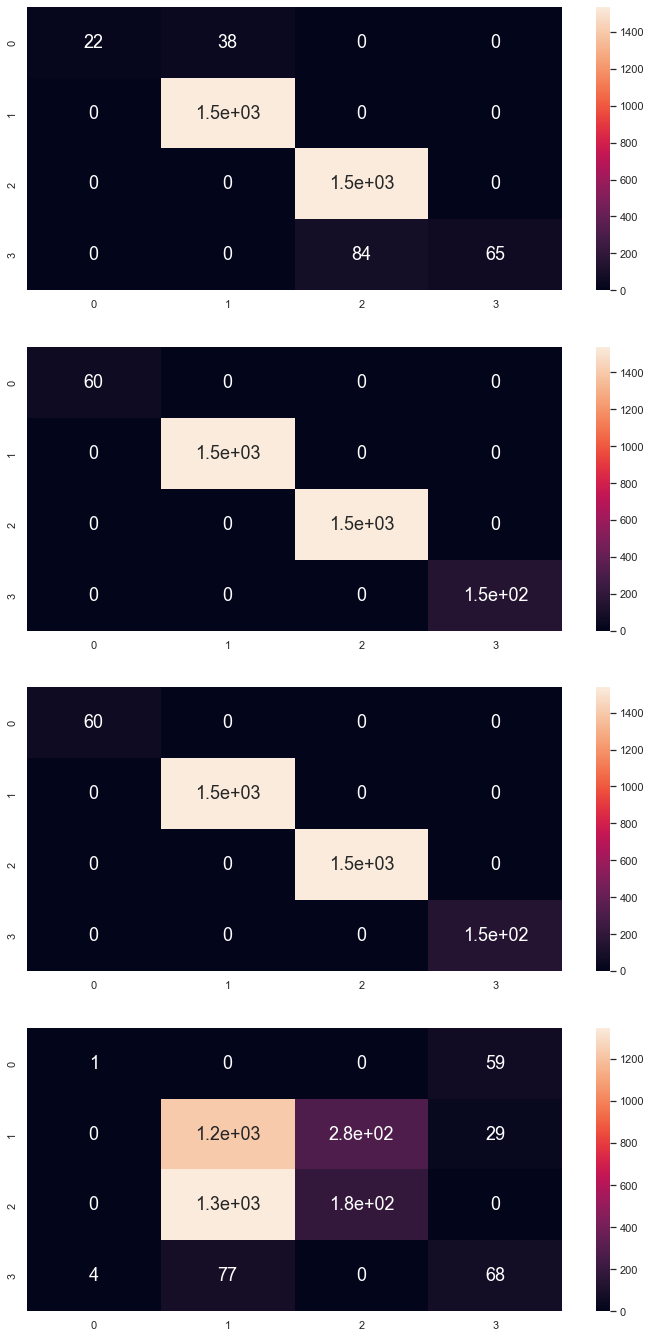

In [13]:
# Plotting Confusion Matrix

X = dataTest[["Nervousness_Label", "Unable to control_Label", "Worry_Label", "Trouble in Relaxation_Label", "Restlessness_Label", "Irritability_Label", "Fear_Label"]]
y = dataTest['Stress_Label']

f, axes = plt.subplots(4, 1, figsize=(12, 24))

print("For SVM Linear:")
y_pred = pd.DataFrame(clf.predict(X))
sns.heatmap(confusion_matrix(y, y_pred), annot=True,annot_kws={"size": 18}, ax = axes[0])
print("")

print("For SVM with linear kernel:")
y_pred = pd.DataFrame(clfLIN.predict(X))
sns.heatmap(confusion_matrix(y, y_pred), annot=True,annot_kws={"size": 18}, ax = axes[1])
print("")

print("For SVM with RBF kernel:")
y_pred = pd.DataFrame(clfRBF.predict(X))
sns.heatmap(confusion_matrix(y, y_pred), annot=True,annot_kws={"size": 18}, ax = axes[2])
print("")

print("For SVM with polynomial kernel:")
y_pred = pd.DataFrame(clfPOLY.predict(X))
sns.heatmap(confusion_matrix(y, y_pred), annot=True,annot_kws={"size": 18}, ax = axes[3])
print("")

### From the above confusion matrix, the TRUE values, which are along the diagonal, are the most for SVM with linear kernel and RBF kernel - suggesting a True 0 / True 1 / True 2 / True 3 - rate of 1.0

In [14]:
### Exporting clfLIN and clfRGF
#https://scikit-learn.org/stable/modules/model_persistence.html

#from joblib import dump, load

#dump(clfLIN, './classificationModels/clfLIN.joblib')
#dump(clfRBF, './classificationModels/clfRBF.joblib')